In [1]:
#import necessary libraries
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#import dataset
df_bike = pd.read_csv("day.csv")

In [3]:
#check 1st 5 entries of dataset
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# check the shape of dataset i.e no. of rows and columns
df_bike.shape

(730, 16)

In [5]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### From above we can say that there are no entries with NAN

### Data type conversion

In [7]:
df_bike['dteday']=pd.to_datetime(df_bike['dteday'])

In [8]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Derived columns

### Conversion of season and weather variables to categoriocal strings
weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case

In [9]:
# replacing seasons with categorical variables
season_list=['spring','summer','fall','winter']
df_bike['season']=df_bike['season'].apply(lambda x: season_list[x-1])

In [10]:
df_bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# replacing weather with categorical variables
weather_list=['less_cloudy','misty','snow_storm','heavy_rain']
df_bike['weathersit']=df_bike['weathersit'].apply(lambda x: weather_list[x-1])

In [12]:
df_bike['weathersit'].value_counts()

less_cloudy    463
misty          246
snow_storm      21
Name: weathersit, dtype: int64

In [13]:
#replacing numerical weekdays by categorical variable
weekday_list = ['sunday','monday','tuesday','wednesday','thursday','friday','saturday']
df_bike['weekday']=df_bike['weekday'].apply(lambda x: weekday_list[x])

In [14]:
#replacing numerical month by categorical variable
mnth_list = ['jan','feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec']
df_bike['mnth']=df_bike['mnth'].apply(lambda x: mnth_list[x-1])

In [15]:
# Drop registered and casual as sum of both is cnt which is redundant, drop instant as it is of no use
# drop dteday as month and year are already present
df_bike=df_bike.drop(['registered','casual','instant','dteday'],axis=1)

In [16]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,less_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,less_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,less_cloudy,9.305237,11.46350,43.6957,12.522300,1600


<AxesSubplot:>

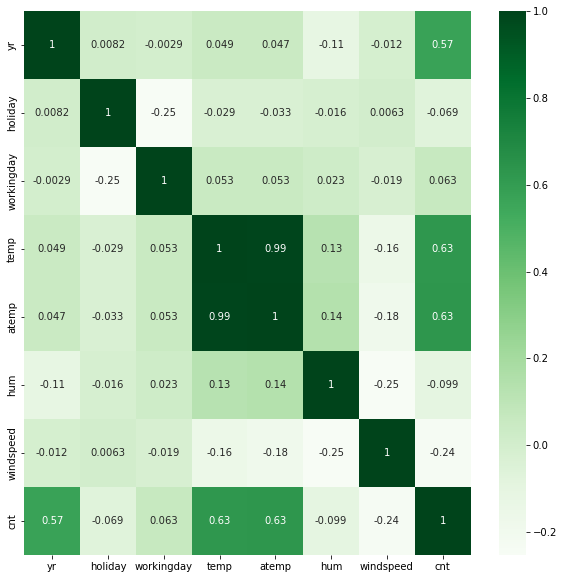

In [17]:
plt.figure(figsize=[10,10])
sns.heatmap(df_bike.corr(),annot=True,cmap='Greens')

#### Temp and atemp are highly correlated so drop atemp as temp is sufficient

In [18]:

df_bike=df_bike.drop(['atemp'],axis=1)

<Figure size 720x720 with 0 Axes>

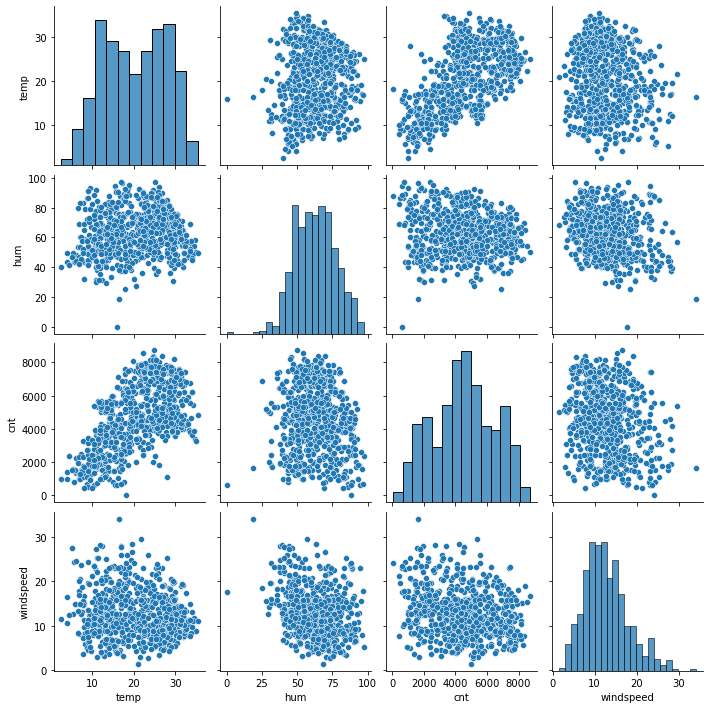

In [19]:
plt.figure(figsize=[10,10])
sns.pairplot(df_bike[['temp','hum','cnt','windspeed']])

#### Subjective question 1:1.	From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Season vs bike count')

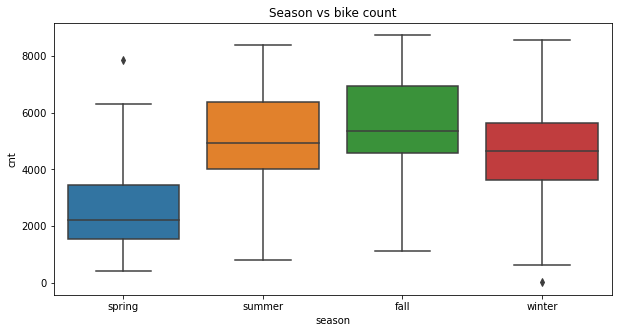

In [20]:
plt.figure(figsize=[10,5])
sns.boxplot(df_bike["season"], df_bike["cnt"])
plt.title("Season vs bike count")

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Month vs bike count')

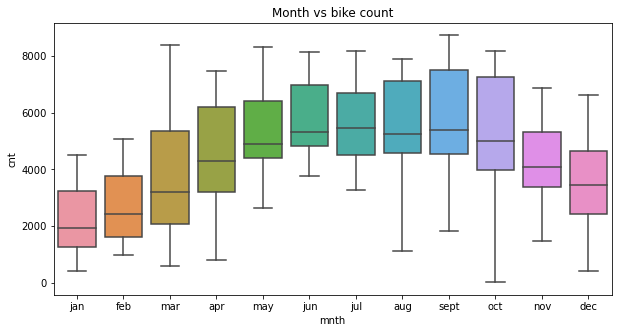

In [21]:
plt.figure(figsize=[10,5])
sns.boxplot(df_bike["mnth"], df_bike["cnt"])
plt.title("Month vs bike count")

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'weekday vs bike count')

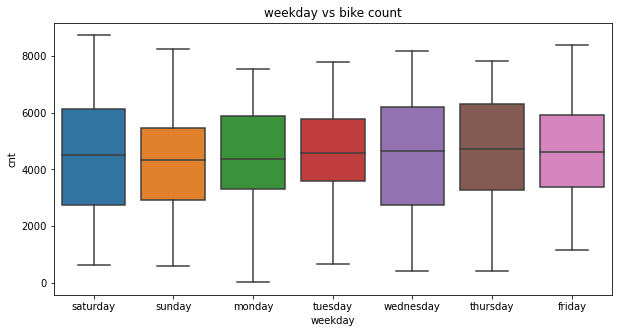

In [22]:
plt.figure(figsize=[10,5])
sns.boxplot(df_bike["weekday"], df_bike["cnt"])
plt.title("weekday vs bike count")

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'weathersit vs bike count')

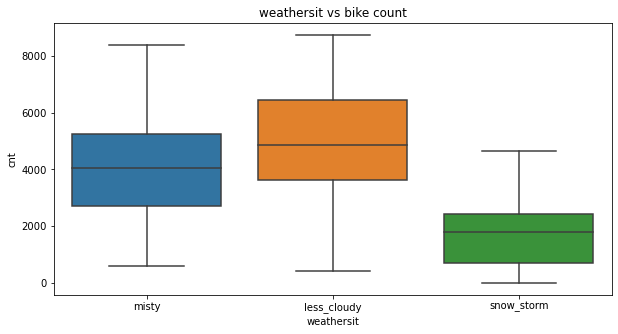

In [23]:
plt.figure(figsize=[10,5])
sns.boxplot(df_bike["weathersit"], df_bike["cnt"])
plt.title("weathersit vs bike count")

#### Conclusion:
 Bike demand was more in summer and fall season and less in spring and winter
 
 Bike demand was more in sept oct and less in Jan dec
 
 Bike demand was almost same over weekdays except slight dip in sunday
 
 Bike demand was less during snow thunderstrom environment and high during clear less cloudy.

### Dummy variable creation
weekday, season, weathersit are all categorical variable, create dummy variables for these for model buliding

In [24]:
# dummy variable creation for weekday
weekday_dummy =  pd.get_dummies(df_bike['weekday'],drop_first=True)

In [25]:
# dummy variable creation for weekdayweekday_dummy.head()

In [26]:
# dummy variable creation for month
month_dummy =  pd.get_dummies(df_bike['mnth'],drop_first=True)

In [27]:
month_dummy.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [28]:
# dummy variable creation for season
season_dummy =  pd.get_dummies(df_bike['season'],drop_first=True)
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [29]:
# dummy variable creation for weather
weathersit_dummy =  pd.get_dummies(df_bike['weathersit'],drop_first=True)
weathersit_dummy.head()

,misty,snow_storm
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [30]:
# concatinating all dataframes of dummy variables
df_bike=pd.concat([df_bike,weekday_dummy,month_dummy,weathersit_dummy,season_dummy],axis=1)

In [31]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mar,may,nov,oct,sept,misty,snow_storm,spring,summer,winter
0,spring,0,jan,0,saturday,0,misty,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,1,0,0
1,spring,0,jan,0,sunday,0,misty,14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,1,0,0
2,spring,0,jan,0,monday,1,less_cloudy,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tuesday,1,less_cloudy,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,wednesday,1,less_cloudy,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [32]:
len(df_bike.columns)

33

In [33]:
df_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'monday', 'saturday',
       'sunday', 'thursday', 'tuesday', 'wednesday', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'misty',
       'snow_storm', 'spring', 'summer', 'winter'],
      dtype='object')

In [34]:
# drop redundant columns since we have all dummy variables created , original columns can be dropped
df_bike=df_bike.drop(['season','weekday','mnth','weathersit'],axis=1)

In [35]:
df_bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sept', 'misty', 'snow_storm', 'spring', 'summer', 'winter'],
      dtype='object')

### Splitting the Data into Training and Testing Sets

In [36]:
df_train,df_test = train_test_split(df_bike, train_size=0.7, test_size=0.3,random_state=100)

In [37]:
df_train.shape

(510, 29)

In [38]:
df_test.shape

(219, 29)

### Scaling the train set

In [39]:
# We use minmax scaler for scalling all numerical variables
scalar= MinMaxScaler()
num_vars=['temp','hum','windspeed','cnt']
df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

C:\Users\vaish\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


### Dividing into X and Y sets for the model building

In [40]:
y_train=df_train.pop('cnt')

In [41]:
X_train=df_train

### Building the model
Feature selection using RFE

In [42]:
# Running RFE with the output number of the variable equal to 15
lr=LinearRegression()
linear_model= lr.fit(X_train,y_train)
rfe=RFE(linear_model,15)
rfe=rfe.fit(X_train,y_train)

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('monday', False, 8),
 ('saturday', True, 1),
 ('sunday', False, 7),
 ('thursday', False, 11),
 ('tuesday', False, 9),
 ('wednesday', False, 12),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sept', True, 1),
 ('misty', True, 1),
 ('snow_storm', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [44]:
rfe_cols=X_train.columns[rfe.support_]

In [45]:
rfe_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'saturday',
       'jan', 'jul', 'sept', 'misty', 'snow_storm', 'spring', 'summer',
       'winter'],
      dtype='object')

In [46]:
# columns not supported
X_train.columns[~rfe.support_]

Index(['monday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'aug', 'dec',
       'feb', 'jun', 'mar', 'may', 'nov', 'oct'],
      dtype='object')

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe=X_train[rfe_cols]

### Building model using statsmodel, for the detailed statistics

In [48]:
# Model analysis via statsmodels ,Adding a constant variable
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          2.31e-191
Time:                        21:32:32   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.000       0.180       0.322
yr             0.2305      0.008     28.807      0.000       0.215       0.246
holiday       -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday     0.0435      0.012      3.781      0.000       0.021       0.066
temp           0.5098      0.034     14.851      0.000       0.442       0.577
hum           -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed     -0.1860      0.025     -7.301      0.000      -0.236      -0.136
saturday       0.0537      0.014      3.707      0.000       0.025       0.082
jan           -0.0343      0.017     -1.980      0.048      -0.068      -0.000
jul           -0.0532      0.018     -2.947      0.003      -0.089      -0.018
sept           0.0812      0.016      4.934      0.000       0.049       0.114
misty         -0.0578      0.010     -5.574      0.000      -0.078      -0.037
snow_storm    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
spring        -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer         0.0497      0.015      3.346      0.001       0.020       0.079
winter         0.0944      0.017      5.479      0.000       0.061       0.128
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Calculate the VIFs for the new model
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.48
13,summer,2.84
10,misty,2.29
0,yr,2.09
6,saturday,1.98


#### VIF of Hum is very large, so dropping hum feature

In [50]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)
X_train_rfe

,yr,holiday,workingday,temp,windspeed,saturday,jan,jul,sept,misty,snow_storm,spring,summer,winter
653,1,0,1,0.509887,0.300794,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.264686,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,1,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.188475,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.355596,0,0,0,0,1,0,0,1,0
578,1,0,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.111379,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.431816,1,0,0,0,1,0,0,0,1


In [51]:
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          7.33e-189
Time:                        21:32:32   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.000       0.112       0.235
yr             0.2344      0.008     29.019      0.000       0.218       0.250
holiday       -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday     0.0465      0.012      3.983      0.000       0.024       0.069
temp           0.4728      0.034     14.037      0.000       0.407       0.539
windspeed     -0.1563      0.025     -6.292      0.000      -0.205      -0.107
saturday       0.0584      0.015      3.980      0.000       0.030       0.087
jan           -0.0389      0.018     -2.215      0.027      -0.073      -0.004
jul           -0.0482      0.018     -2.635      0.009      -0.084      -0.012
sept           0.0753      0.017      4.522      0.000       0.043       0.108
misty         -0.0826      0.009     -9.592      0.000      -0.100      -0.066
snow_storm    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
spring        -0.0597      0.021     -2.861      0.004      -0.101      -0.019
summer         0.0434      0.015      2.890      0.004       0.014       0.073
winter         0.0797      0.017      4.650      0.000       0.046       0.113
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
11,spring,3.08
12,summer,2.33
0,yr,2.08
13,winter,1.99
5,saturday,1.97
6,jan,1.62
7,jul,1.59


#### VIF of temp is very large, so dropping temp feature

In [53]:
X_train_rfe=X_train_rfe.drop(['temp'],axis=1)
X_train_rfe
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          4.04e-154
Time:                        21:32:32   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5448      0.020     27.136      0.000       0.505       0.584
yr             0.2478      0.009     26.156      0.000       0.229       0.266
holiday       -0.0571      0.032     -1.771      0.077      -0.120       0.006
workingday     0.0480      0.014      3.482      0.001       0.021       0.075
windspeed     -0.1878      0.029     -6.429      0.000      -0.245      -0.130
saturday       0.0564      0.017      3.252      0.001       0.022       0.090
jan           -0.1024      0.020     -5.104      0.000      -0.142      -0.063
jul           -0.0099      0.021     -0.461      0.645      -0.052       0.032
sept           0.0708      0.020      3.601      0.000       0.032       0.109
misty         -0.0896      0.010     -8.824      0.000      -0.110      -0.070
snow_storm    -0.3045      0.029    -10.634      0.000      -0.361      -0.248
spring        -0.2603      0.018    -14.490      0.000      -0.296      -0.225
summer        -0.0440      0.016     -2.729      0.007      -0.076      -0.012
winter        -0.0749      0.016     -4.829      0.000      -0.105      -0.044
==============================================================================
Omnibus:                       34.622   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.832
Skew:                          -0.419   Prob(JB):                     3.07e-15
Kurtosis:                       4.563   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
3,windspeed,4.27
2,workingday,3.83
10,spring,2.97
11,summer,2.27
12,winter,1.99
0,yr,1.91
4,saturday,1.69
5,jan,1.60
8,misty,1.56
6,jul,1.30


#### Jul month has very high P value , it is insignificant so drop it

In [55]:
X_train_rfe=X_train_rfe.drop(['jul'],axis=1)
X_train_rfe
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          3.62e-155
Time:                        21:32:32   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5409      0.018     29.669      0.000       0.505       0.577
yr             0.2478      0.009     26.182      0.000       0.229       0.266
holiday       -0.0567      0.032     -1.760      0.079      -0.120       0.007
workingday     0.0483      0.014      3.506      0.000       0.021       0.075
windspeed     -0.1877      0.029     -6.431      0.000      -0.245      -0.130
saturday       0.0565      0.017      3.263      0.001       0.022       0.091
jan           -0.1025      0.020     -5.111      0.000      -0.142      -0.063
sept           0.0736      0.019      3.928      0.000       0.037       0.110
misty         -0.0893      0.010     -8.820      0.000      -0.109      -0.069
snow_storm    -0.3046      0.029    -10.647      0.000      -0.361      -0.248
spring        -0.2568      0.016    -15.797      0.000      -0.289      -0.225
summer        -0.0405      0.014     -2.848      0.005      -0.068      -0.013
winter        -0.0716      0.014     -5.213      0.000      -0.099      -0.045
==============================================================================
Omnibus:                       34.752   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.753
Skew:                          -0.423   Prob(JB):                     3.20e-15
Kurtosis:                       4.558   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
3,windspeed,4.12
2,workingday,3.54
9,spring,2.68
10,summer,2.00
0,yr,1.89
11,winter,1.78
4,saturday,1.62
5,jan,1.60
7,misty,1.56
6,sept,1.20


### Holiday has p>0.05, so drop it

In [57]:
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)
X_train_rfe
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.30e-155
Time:                        21:32:32   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5334      0.018     30.033      0.000       0.499       0.568
yr             0.2480      0.009     26.149      0.000       0.229       0.267
workingday     0.0567      0.013      4.377      0.000       0.031       0.082
windspeed     -0.1887      0.029     -6.453      0.000      -0.246      -0.131
saturday       0.0650      0.017      3.900      0.000       0.032       0.098
jan           -0.1031      0.020     -5.130      0.000      -0.143      -0.064
sept           0.0714      0.019      3.810      0.000       0.035       0.108
misty         -0.0888      0.010     -8.757      0.000      -0.109      -0.069
snow_storm    -0.3034      0.029    -10.586      0.000      -0.360      -0.247
spring        -0.2581      0.016    -15.860      0.000      -0.290      -0.226
summer        -0.0406      0.014     -2.847      0.005      -0.069      -0.013
winter        -0.0729      0.014     -5.303      0.000      -0.100      -0.046
==============================================================================
Omnibus:                       39.474   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.218
Skew:                          -0.458   Prob(JB):                     3.81e-18
Kurtosis:                       4.714   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
2,windspeed,4.04
1,workingday,3.29
8,spring,2.65
9,summer,1.99
0,yr,1.88
10,winter,1.73
4,jan,1.60
3,saturday,1.56
6,misty,1.56
5,sept,1.18


#### Add sunday to see if model improves

In [59]:
X_train_rfe['sunday']=X_train['sunday']

In [60]:
X_train_rfe.head()

,yr,workingday,windspeed,saturday,jan,sept,misty,snow_storm,spring,summer,winter,sunday
653,1,1,0.300794,0,0,0,0,0,0,0,1,0
576,1,1,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,1,0,0,1,0,1,0,0,0
728,1,0,0.663106,0,0,0,0,0,1,0,0,1
482,1,0,0.188475,1,0,0,1,0,0,1,0,0


In [61]:

X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          3.62e-155
Time:                        21:32:32   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4843      0.033     14.640      0.000       0.419       0.549
yr             0.2478      0.009     26.182      0.000       0.229       0.266
workingday     0.1050      0.030      3.460      0.001       0.045       0.165
windspeed     -0.1877      0.029     -6.431      0.000      -0.245      -0.130
saturday       0.1132      0.032      3.534      0.000       0.050       0.176
jan           -0.1025      0.020     -5.111      0.000      -0.142      -0.063
sept           0.0736      0.019      3.928      0.000       0.037       0.110
misty         -0.0893      0.010     -8.820      0.000      -0.109      -0.069
snow_storm    -0.3046      0.029    -10.647      0.000      -0.361      -0.248
spring        -0.2568      0.016    -15.797      0.000      -0.289      -0.225
summer        -0.0405      0.014     -2.848      0.005      -0.068      -0.013
winter        -0.0716      0.014     -5.213      0.000      -0.099      -0.045
sunday         0.0567      0.032      1.760      0.079      -0.007       0.120
==============================================================================
Omnibus:                       34.752   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.753
Skew:                          -0.423   Prob(JB):                     3.20e-15
Kurtosis:                       4.558   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
1,workingday,5.35
2,windspeed,4.72
8,spring,2.79
9,summer,2.16
3,saturday,2.06
0,yr,2.01
10,winter,1.96
11,sunday,1.92
4,jan,1.60
6,misty,1.58


### Drop working day as it has VIF >5

In [63]:
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)
X_train_rfe
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     156.5
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.01e-153
Time:                        21:32:32   Log-Likelihood:                 419.54
No. Observations:                 510   AIC:                            -815.1
Df Residuals:                     498   BIC:                            -764.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5872      0.015     40.182      0.000       0.559       0.616
yr             0.2483      0.010     25.959      0.000       0.230       0.267
windspeed     -0.1902      0.030     -6.447      0.000      -0.248      -0.132
saturday       0.0123      0.013      0.916      0.360      -0.014       0.039
jan           -0.1035      0.020     -5.106      0.000      -0.143      -0.064
sept           0.0696      0.019      3.683      0.000       0.032       0.107
misty         -0.0874      0.010     -8.551      0.000      -0.107      -0.067
snow_storm    -0.2999      0.029    -10.380      0.000      -0.357      -0.243
spring        -0.2600      0.016    -15.849      0.000      -0.292      -0.228
summer        -0.0407      0.014     -2.830      0.005      -0.069      -0.012
winter        -0.0753      0.014     -5.442      0.000      -0.102      -0.048
sunday        -0.0442      0.014     -3.184      0.002      -0.071      -0.017
==============================================================================
Omnibus:                       46.458   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.734
Skew:                          -0.516   Prob(JB):                     2.20e-22
Kurtosis:                       4.905   Cond. No.                         8.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Drop saturday as p>0.05 and insignificant

In [64]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
1,windspeed,3.60
7,spring,2.58
8,summer,1.87
0,yr,1.78
9,winter,1.66
3,jan,1.60
5,misty,1.51
2,saturday,1.20
10,sunday,1.18
4,sept,1.14


In [65]:
X_train_rfe=X_train_rfe.drop(['saturday'],axis=1)
X_train_rfe
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.14e-154
Time:                        21:32:32   Log-Likelihood:                 419.11
No. Observations:                 510   AIC:                            -816.2
Df Residuals:                     499   BIC:                            -769.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5891      0.014     40.705      0.000       0.561       0.617
yr             0.2481      0.010     25.947      0.000       0.229       0.267
windspeed     -0.1889      0.029     -6.411      0.000      -0.247      -0.131
jan           -0.1033      0.020     -5.095      0.000      -0.143      -0.063
sept           0.0695      0.019      3.678      0.000       0.032       0.107
misty         -0.0874      0.010     -8.550      0.000      -0.107      -0.067
snow_storm    -0.2997      0.029    -10.376      0.000      -0.356      -0.243
spring        -0.2599      0.016    -15.845      0.000      -0.292      -0.228
summer        -0.0408      0.014     -2.837      0.005      -0.069      -0.013
winter        -0.0750      0.014     -5.423      0.000      -0.102      -0.048
sunday        -0.0464      0.014     -3.399      0.001      -0.073      -0.020
==============================================================================
Omnibus:                       44.678   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.042
Skew:                          -0.483   Prob(JB):                     1.89e-22
Kurtosis:                       4.943   Cond. No.                         8.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Add may month to see if model improves

In [66]:
X_train_rfe['may']=X_train['may']
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.5
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          2.55e-155
Time:                        21:32:33   Log-Likelihood:                 423.33
No. Observations:                 510   AIC:                            -822.7
Df Residuals:                     498   BIC:                            -771.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5864      0.014     40.732      0.000       0.558       0.615
yr             0.2491      0.009     26.228      0.000       0.230       0.268
windspeed     -0.1796      0.029     -6.102      0.000      -0.237      -0.122
jan           -0.1023      0.020     -5.082      0.000      -0.142      -0.063
sept           0.0700      0.019      3.731      0.000       0.033       0.107
misty         -0.0892      0.010     -8.773      0.000      -0.109      -0.069
snow_storm    -0.2983      0.029    -10.402      0.000      -0.355      -0.242
spring        -0.2609      0.016    -16.021      0.000      -0.293      -0.229
summer        -0.0614      0.016     -3.846      0.000      -0.093      -0.030
winter        -0.0750      0.014     -5.465      0.000      -0.102      -0.048
sunday        -0.0466      0.014     -3.439      0.001      -0.073      -0.020
may            0.0585      0.020      2.882      0.004       0.019       0.098
==============================================================================
Omnibus:                       45.370   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.434
Skew:                          -0.450   Prob(JB):                     1.42e-25
Kurtosis:                       5.139   Cond. No.                         8.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Add feb to see if model improves

In [67]:
X_train_rfe['feb']=X_train['feb']
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     148.7
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          8.52e-156
Time:                        21:32:33   Log-Likelihood:                 427.10
No. Observations:                 510   AIC:                            -828.2
Df Residuals:                     497   BIC:                            -773.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5860      0.014     40.967      0.000       0.558       0.614
yr             0.2492      0.009     26.403      0.000       0.231       0.268
windspeed     -0.1794      0.029     -6.133      0.000      -0.237      -0.122
jan           -0.1305      0.023     -5.794      0.000      -0.175      -0.086
sept           0.0700      0.019      3.753      0.000       0.033       0.107
misty         -0.0887      0.010     -8.782      0.000      -0.109      -0.069
snow_storm    -0.2974      0.028    -10.437      0.000      -0.353      -0.241
spring        -0.2328      0.019    -12.115      0.000      -0.271      -0.195
summer        -0.0615      0.016     -3.875      0.000      -0.093      -0.030
winter        -0.0752      0.014     -5.508      0.000      -0.102      -0.048
sunday        -0.0457      0.013     -3.391      0.001      -0.072      -0.019
may            0.0585      0.020      2.900      0.004       0.019       0.098
feb           -0.0656      0.024     -2.722      0.007      -0.113      -0.018
==============================================================================
Omnibus:                       51.200   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.448
Skew:                          -0.533   Prob(JB):                     4.25e-27
Kurtosis:                       5.140   Cond. No.                         9.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Add jun month to see if model improves

In [68]:
X_train_rfe['jun']=X_train['jun']
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     143.1
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          2.37e-158
Time:                        21:32:33   Log-Likelihood:                 435.80
No. Observations:                 510   AIC:                            -843.6
Df Residuals:                     496   BIC:                            -784.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5719      0.014     39.489      0.000       0.543       0.600
yr             0.2499      0.009     26.900      0.000       0.232       0.268
windspeed     -0.1702      0.029     -5.898      0.000      -0.227      -0.114
jan           -0.1303      0.022     -5.875      0.000      -0.174      -0.087
sept           0.0778      0.018      4.220      0.000       0.042       0.114
misty         -0.0853      0.010     -8.546      0.000      -0.105      -0.066
snow_storm    -0.2924      0.028    -10.415      0.000      -0.348      -0.237
spring        -0.2236      0.019    -11.751      0.000      -0.261      -0.186
summer        -0.0760      0.016     -4.751      0.000      -0.107      -0.045
winter        -0.0661      0.014     -4.856      0.000      -0.093      -0.039
sunday        -0.0464      0.013     -3.503      0.001      -0.072      -0.020
may            0.0826      0.021      3.993      0.000       0.042       0.123
feb           -0.0658      0.024     -2.772      0.006      -0.112      -0.019
jun            0.0808      0.019      4.149      0.000       0.043       0.119
==============================================================================
Omnibus:                       56.367   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.271
Skew:                          -0.547   Prob(JB):                     2.34e-33
Kurtosis:                       5.423   Cond. No.                         9.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
6,spring,3.76
1,windspeed,3.57
7,summer,2.73
2,jan,2.03
0,yr,1.79
11,feb,1.76
10,may,1.66
8,winter,1.65
4,misty,1.52
12,jun,1.25


In [70]:
X_train_rfe=X_train_rfe.drop(['spring'],axis=1)
X_train_rfe
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          4.04e-133
Time:                        21:32:33   Log-Likelihood:                 373.18
No. Observations:                 510   AIC:                            -720.4
Df Residuals:                     497   BIC:                            -665.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5216      0.016     33.378      0.000       0.491       0.552
yr             0.2547      0.010     24.299      0.000       0.234       0.275
windspeed     -0.2340      0.032     -7.308      0.000      -0.297      -0.171
jan           -0.2845      0.020    -14.094      0.000      -0.324      -0.245
sept           0.1282      0.020      6.328      0.000       0.088       0.168
misty         -0.0869      0.011     -7.712      0.000      -0.109      -0.065
snow_storm    -0.2868      0.032     -9.046      0.000      -0.349      -0.224
summer        -0.0114      0.017     -0.669      0.504      -0.045       0.022
winter        -0.0026      0.014     -0.187      0.852      -0.030       0.025
sunday        -0.0464      0.015     -3.099      0.002      -0.076      -0.017
may            0.0860      0.023      3.683      0.000       0.040       0.132
feb           -0.2151      0.023     -9.503      0.000      -0.260      -0.171
jun            0.1072      0.022      4.906      0.000       0.064       0.150
==============================================================================
Omnibus:                       50.996   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.529
Skew:                          -0.681   Prob(JB):                     8.87e-18
Kurtosis:                       4.356   Cond. No.                         8.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
X_train_rfe=X_train_rfe.drop(['may','summer'],axis=1)
X_train_rfe
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     129.8
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          6.53e-132
Time:                        21:32:33   Log-Likelihood:                 365.27
No. Observations:                 510   AIC:                            -708.5
Df Residuals:                     499   BIC:                            -662.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5355      0.015     35.674      0.000       0.506       0.565
yr             0.2530      0.011     23.837      0.000       0.232       0.274
windspeed     -0.2446      0.032     -7.647      0.000      -0.307      -0.182
jan           -0.2957      0.019    -15.191      0.000      -0.334      -0.257
sept           0.1189      0.020      5.950      0.000       0.080       0.158
misty         -0.0837      0.011     -7.377      0.000      -0.106      -0.061
snow_storm    -0.2900      0.032     -9.028      0.000      -0.353      -0.227
winter        -0.0130      0.013     -0.996      0.320      -0.039       0.013
sunday        -0.0459      0.015     -3.023      0.003      -0.076      -0.016
feb           -0.2250      0.022    -10.215      0.000      -0.268      -0.182
jun            0.0895      0.021      4.264      0.000       0.048       0.131
==============================================================================
Omnibus:                       51.170   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.849
Skew:                          -0.718   Prob(JB):                     1.52e-16
Kurtosis:                       4.168   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
1,windspeed,2.39
0,yr,1.76
4,misty,1.45
6,winter,1.34
7,sunday,1.15
2,jan,1.14
8,feb,1.14
9,jun,1.10
3,sept,1.08
5,snow_storm,1.08


#### Add temp to see if model improves

In [73]:
X_train_rfe['temp']=X_train['temp']
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     208.0
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          3.19e-178
Time:                        21:32:33   Log-Likelihood:                 477.58
No. Observations:                 510   AIC:                            -931.2
Df Residuals:                     498   BIC:                            -880.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2271      0.022     10.256      0.000       0.184       0.271
yr             0.2359      0.009     27.471      0.000       0.219       0.253
windspeed     -0.1535      0.026     -5.845      0.000      -0.205      -0.102
jan           -0.1104      0.019     -5.750      0.000      -0.148      -0.073
sept           0.0717      0.016      4.399      0.000       0.040       0.104
misty         -0.0739      0.009     -8.092      0.000      -0.092      -0.056
snow_storm    -0.2863      0.026    -11.099      0.000      -0.337      -0.236
winter         0.0725      0.012      6.194      0.000       0.049       0.095
sunday        -0.0461      0.012     -3.780      0.000      -0.070      -0.022
feb           -0.0803      0.020     -4.072      0.000      -0.119      -0.042
jun            0.0214      0.017      1.236      0.217      -0.013       0.055
temp           0.4579      0.028     16.601      0.000       0.404       0.512
==============================================================================
Omnibus:                       67.902   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.483
Skew:                          -0.725   Prob(JB):                     3.47e-33
Kurtosis:                       5.221   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
10,temp,4.24
1,windspeed,3.49
0,yr,2.05
4,misty,1.52
6,winter,1.34
9,jun,1.23
2,jan,1.20
3,sept,1.18
8,feb,1.18
7,sunday,1.17


#### Drop June since it is insignificant

In [75]:
X_train_rfe=X_train_rfe.drop(['jun'],axis=1)
X_train_rfe
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.4
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          4.40e-179
Time:                        21:32:33   Log-Likelihood:                 476.80
No. Observations:                 510   AIC:                            -931.6
Df Residuals:                     499   BIC:                            -885.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2253      0.022     10.190      0.000       0.182       0.269
yr             0.2356      0.009     27.431      0.000       0.219       0.252
windspeed     -0.1535      0.026     -5.841      0.000      -0.205      -0.102
jan           -0.1098      0.019     -5.718      0.000      -0.148      -0.072
sept           0.0687      0.016      4.259      0.000       0.037       0.100
misty         -0.0747      0.009     -8.188      0.000      -0.093      -0.057
snow_storm    -0.2874      0.026    -11.140      0.000      -0.338      -0.237
winter         0.0714      0.012      6.116      0.000       0.048       0.094
sunday        -0.0459      0.012     -3.764      0.000      -0.070      -0.022
feb           -0.0804      0.020     -4.074      0.000      -0.119      -0.042
temp           0.4660      0.027     17.376      0.000       0.413       0.519
==============================================================================
Omnibus:                       67.577   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.985
Skew:                          -0.724   Prob(JB):                     7.34e-33
Kurtosis:                       5.207   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
9,temp,3.78
1,windspeed,3.48
0,yr,2.05
4,misty,1.51
6,winter,1.32
2,jan,1.20
7,sunday,1.17
8,feb,1.17
3,sept,1.15
5,snow_storm,1.08


#### Add spring to see if model improves

In [77]:
X_train_rfe['spring']=X_train['spring']
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.4
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          3.74e-184
Time:                        21:32:33   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -959.2
Df Residuals:                     498   BIC:                            -908.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2914      0.025     11.810      0.000       0.243       0.340
yr             0.2366      0.008     28.329      0.000       0.220       0.253
windspeed     -0.1481      0.026     -5.790      0.000      -0.198      -0.098
jan           -0.0631      0.021     -3.070      0.002      -0.103      -0.023
sept           0.0650      0.016      4.146      0.000       0.034       0.096
misty         -0.0778      0.009     -8.754      0.000      -0.095      -0.060
snow_storm    -0.2902      0.025    -11.566      0.000      -0.339      -0.241
winter         0.0408      0.013      3.221      0.001       0.016       0.066
sunday        -0.0460      0.012     -3.879      0.000      -0.069      -0.023
feb           -0.0284      0.021     -1.324      0.186      -0.070       0.014
temp           0.3851      0.030     12.842      0.000       0.326       0.444
spring        -0.0965      0.018     -5.459      0.000      -0.131      -0.062
==============================================================================
Omnibus:                       81.721   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.290
Skew:                          -0.781   Prob(JB):                     1.20e-49
Kurtosis:                       5.856   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Drop feb since its insignificant

In [78]:
X_train_rfe=X_train_rfe.drop(['feb'],axis=1)
X_train_rfe
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          5.58e-185
Time:                        21:32:33   Log-Likelihood:                 490.72
No. Observations:                 510   AIC:                            -959.4
Df Residuals:                     499   BIC:                            -912.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2876      0.025     11.727      0.000       0.239       0.336
yr             0.2364      0.008     28.289      0.000       0.220       0.253
windspeed     -0.1474      0.026     -5.760      0.000      -0.198      -0.097
jan           -0.0501      0.018     -2.772      0.006      -0.086      -0.015
sept           0.0647      0.016      4.125      0.000       0.034       0.096
misty         -0.0778      0.009     -8.751      0.000      -0.095      -0.060
snow_storm    -0.2904      0.025    -11.568      0.000      -0.340      -0.241
winter         0.0421      0.013      3.338      0.001       0.017       0.067
sunday        -0.0464      0.012     -3.911      0.000      -0.070      -0.023
temp           0.3905      0.030     13.132      0.000       0.332       0.449
spring        -0.1069      0.016     -6.748      0.000      -0.138      -0.076
==============================================================================
Omnibus:                       79.442   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.272
Skew:                          -0.757   Prob(JB):                     8.94e-49
Kurtosis:                       5.850   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
1,windspeed,3.95
8,temp,3.84
9,spring,2.24
0,yr,2.06
2,jan,1.60
4,misty,1.51
6,winter,1.37
7,sunday,1.17
3,sept,1.16
5,snow_storm,1.08


#### Add summer to see if model imrpoves

In [80]:
X_train_rfe['summer']=X_train['summer']
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          3.32e-187
Time:                        21:32:33   Log-Likelihood:                 498.84
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2135      0.030      7.018      0.000       0.154       0.273
yr             0.2351      0.008     28.525      0.000       0.219       0.251
windspeed     -0.1575      0.025     -6.217      0.000      -0.207      -0.108
jan           -0.0416      0.018     -2.319      0.021      -0.077      -0.006
sept           0.0844      0.016      5.202      0.000       0.053       0.116
misty         -0.0794      0.009     -9.057      0.000      -0.097      -0.062
snow_storm    -0.2879      0.025    -11.635      0.000      -0.336      -0.239
winter         0.0881      0.017      5.211      0.000       0.055       0.121
sunday        -0.0465      0.012     -3.981      0.000      -0.069      -0.024
temp           0.4598      0.034     13.520      0.000       0.393       0.527
spring        -0.0514      0.021     -2.464      0.014      -0.092      -0.010
summer         0.0574      0.014      4.014      0.000       0.029       0.085
==============================================================================
Omnibus:                       81.378   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.119
Skew:                          -0.789   Prob(JB):                     7.13e-48
Kurtosis:                       5.780   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
1,windspeed,4.61
8,temp,3.92
9,spring,2.64
0,yr,2.07
10,summer,1.90
6,winter,1.64
2,jan,1.60
4,misty,1.55
3,sept,1.22
7,sunday,1.17


#### Add holiday to see if model imrpoves

In [82]:
X_train_rfe['holiday']=X_train['holiday']
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.7
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.70e-189
Time:                        21:32:33   Log-Likelihood:                 507.10
No. Observations:                 510   AIC:                            -988.2
Df Residuals:                     497   BIC:                            -933.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2156      0.030      7.196      0.000       0.157       0.274
yr             0.2347      0.008     28.907      0.000       0.219       0.251
windspeed     -0.1555      0.025     -6.232      0.000      -0.205      -0.107
jan           -0.0408      0.018     -2.309      0.021      -0.076      -0.006
sept           0.0883      0.016      5.519      0.000       0.057       0.120
misty         -0.0813      0.009     -9.403      0.000      -0.098      -0.064
snow_storm    -0.2926      0.024    -11.995      0.000      -0.341      -0.245
winter         0.0914      0.017      5.481      0.000       0.059       0.124
sunday        -0.0499      0.012     -4.322      0.000      -0.073      -0.027
temp           0.4589      0.033     13.699      0.000       0.393       0.525
spring        -0.0486      0.021     -2.367      0.018      -0.089      -0.008
summer         0.0574      0.014      4.077      0.000       0.030       0.085
holiday       -0.1042      0.026     -4.045      0.000      -0.155      -0.054
==============================================================================
Omnibus:                       68.143   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.062
Skew:                          -0.691   Prob(JB):                     5.28e-37
Kurtosis:                       5.439   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
1,windspeed,4.61
8,temp,3.92
9,spring,2.65
0,yr,2.07
10,summer,1.90
6,winter,1.66
2,jan,1.60
4,misty,1.56
3,sept,1.23
7,sunday,1.18


In [84]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'aug', 'dec',
       'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'misty',
       'snow_storm', 'spring', 'summer', 'winter'],
      dtype='object')

In [85]:
X_train_rfe.columns

Index(['yr', 'windspeed', 'jan', 'sept', 'misty', 'snow_storm', 'winter',
       'sunday', 'temp', 'spring', 'summer', 'holiday'],
      dtype='object')

#### Add Oct to see if model improves

In [86]:
X_train_rfe['oct']=X_train['oct']
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lin_model=lr.fit()
lin_model.summary()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.5
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.24e-189
Time:                        21:32:33   Log-Likelihood:                 510.22
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     496   BIC:                            -933.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2321      0.031      7.597      0.000       0.172       0.292
yr             0.2353      0.008     29.119      0.000       0.219       0.251
windspeed     -0.1583      0.025     -6.370      0.000      -0.207      -0.109
jan           -0.0438      0.018     -2.484      0.013      -0.078      -0.009
sept           0.0919      0.016      5.747      0.000       0.060       0.123
misty         -0.0822      0.009     -9.548      0.000      -0.099      -0.065
snow_storm    -0.3002      0.024    -12.271      0.000      -0.348      -0.252
winter         0.0702      0.019      3.759      0.000       0.033       0.107
sunday        -0.0511      0.011     -4.447      0.000      -0.074      -0.029
temp           0.4385      0.034     12.772      0.000       0.371       0.506
spring        -0.0567      0.021     -2.737      0.006      -0.097      -0.016
summer         0.0542      0.014      3.853      0.000       0.027       0.082
holiday       -0.1026      0.026     -4.004      0.000      -0.153      -0.052
oct            0.0434      0.018      2.473      0.014       0.009       0.078
==============================================================================
Omnibus:                       81.576   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.557
Skew:                          -0.784   Prob(JB):                     4.70e-49
Kurtosis:                       5.831   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
1,windspeed,4.61
8,temp,3.97
9,spring,2.65
6,winter,2.14
0,yr,2.08
10,summer,1.91
2,jan,1.60
12,oct,1.59
4,misty,1.56
3,sept,1.25


### Predict the model for train dataset and plot the distribution of error terms

In [88]:
# predict for train dataset
y_train_pred = lin_model.predict(X_train_sm)

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Error terms distribution'}, ylabel='Density'>

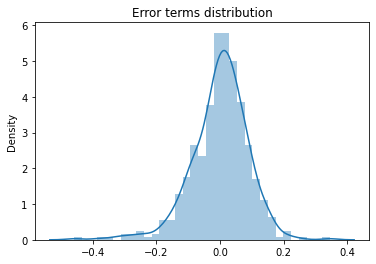

In [89]:
# plot distribution of error terms
res = y_train - y_train_pred
plt.title('Error terms distribution')
sns.distplot(res)

### Making predictions for test dataset

In [90]:
num_vars=['temp','hum','windspeed','cnt']
df_test[num_vars] = scalar.transform(df_test[num_vars])

C:\Users\vaish\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [91]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,monday,saturday,sunday,...,mar,may,nov,oct,sept,misty,snow_storm,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,1,0,0,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,0,0,1,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [92]:
y_test=df_test.pop('cnt')
x_test= df_test[X_train_rfe.columns]

In [93]:
x_test.head()

,yr,windspeed,jan,sept,misty,snow_storm,winter,sunday,temp,spring,summer,holiday,oct
184,0,0.084219,0,0,1,0,0,0,0.831783,0,0,1,0
535,1,0.153728,0,0,0,0,0,0,0.901354,0,1,0,0
299,0,0.334206,0,0,1,0,1,0,0.511964,0,0,0,1
221,0,0.339570,0,0,0,0,0,0,0.881625,0,0,0,0
152,0,0.537414,0,0,0,0,0,0,0.817246,0,1,0,0


In [94]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [95]:
X_test_sm=sm.add_constant(x_test)
y_test_pred = lin_model.predict(X_test_sm)


C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### R^2 value calculation  for test dataset prediction

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8103265213204247

### Model evaluation

In [97]:
y_test_pred


184    0.398592
535    0.892444
299    0.434999
221    0.564897
152    0.559531
         ...   
400    0.344772
702    0.720326
127    0.480508
640    0.817397
72     0.288577
Length: 219, dtype: float64

In [98]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

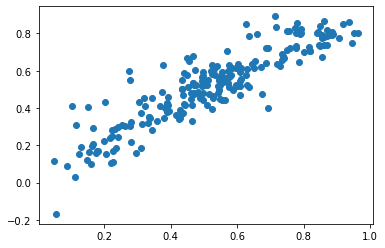

In [99]:
plt.scatter(y_test,y_test_pred)

### Conclusion

### The model equation is
### y= 0.2321 +0.2353*yr -0.1583 * windspeed -0.0438 * jan +0.0919* sept -0.0822 * misty -0.3002 *snow_strom +0.0702 * winter - 0.0511 * sunday + 0.4385 * temp - 0.0567 *spring +0.0542 * summer -0.1026 * holiday +0.0434 * oct

####  Increase in bike demand:
1. october and september month
2. winter season
3. Higher temperature and summer season

####  Decrease in bike demand:
1. When windy environment
2. In month of Jan as spring season is at peak
3. Misty, thunderstrom and snow weather as people tend to saty indorrs due to bad weather.
4. During holidays and sundays as people tend to saty indorrs.